In [102]:
# Data
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_formats = ['retina']
sns.set_style("white")

In [103]:
# Read in clean USAID data pickle
usaid = pd.read_pickle('./clean_usaid.pkl')

In [104]:
usaid.head()

,country_name,region_name,income_group_name,implementing_agency_name,dac_category_name,dac_sector_name,assistance_category_name,fiscal_year,constant_amount
0,Afghanistan,South and Central Asia,Low Income Country,Department of Defense,Governance,"Conflict, Peace, and Security",Military,2011,10914528417
1,Afghanistan,South and Central Asia,Low Income Country,Department of Defense,Governance,"Conflict, Peace, and Security",Military,2012,9966142830
4,Afghanistan,South and Central Asia,Low Income Country,Department of Defense,Governance,"Conflict, Peace, and Security",Military,2013,7345968099
7,Afghanistan,South and Central Asia,Low Income Country,Department of Defense,Governance,"Conflict, Peace, and Security",Military,2010,7245724425
9,Afghanistan,South and Central Asia,Low Income Country,Department of Defense,Governance,"Conflict, Peace, and Security",Military,2015,6207678503


In [105]:
usaid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359342 entries, 0 to 986232
Data columns (total 9 columns):
country_name                359342 non-null object
region_name                 359342 non-null object
income_group_name           359342 non-null object
implementing_agency_name    359342 non-null object
dac_category_name           359342 non-null object
dac_sector_name             359342 non-null object
assistance_category_name    359342 non-null object
fiscal_year                 359342 non-null int64
constant_amount             359342 non-null int64
dtypes: int64(2), object(7)
memory usage: 27.4+ MB


In [106]:
# Read in HDI data pickle
hdi = pd.read_pickle('./hdi_data.pkl')

In [107]:
hdi.head()

,Country,Year,HDI_Change
0,Afghanistan,1990,NaN
1,Albania,1990,NaN
2,Algeria,1990,NaN
3,Andorra,1990,NaN
4,Angola,1990,NaN


In [108]:
hdi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5292 entries, 0 to 5318
Data columns (total 3 columns):
Country       5292 non-null object
Year          5292 non-null int64
HDI_Change    4565 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 165.4+ KB


In [109]:
# Merge dataframes
df = pd.merge(usaid, hdi,  
              how='left', 
              left_on=['country_name','fiscal_year'], 
              right_on = ['Country','Year'])

In [110]:
df.head()

,country_name,region_name,income_group_name,implementing_agency_name,dac_category_name,dac_sector_name,assistance_category_name,fiscal_year,constant_amount,Country,Year,HDI_Change
0,Afghanistan,South and Central Asia,Low Income Country,Department of Defense,Governance,"Conflict, Peace, and Security",Military,2011,10914528417,Afghanistan,2011.0,0.008
1,Afghanistan,South and Central Asia,Low Income Country,Department of Defense,Governance,"Conflict, Peace, and Security",Military,2012,9966142830,Afghanistan,2012.0,0.011
2,Afghanistan,South and Central Asia,Low Income Country,Department of Defense,Governance,"Conflict, Peace, and Security",Military,2013,7345968099,Afghanistan,2013.0,0.005
3,Afghanistan,South and Central Asia,Low Income Country,Department of Defense,Governance,"Conflict, Peace, and Security",Military,2010,7245724425,Afghanistan,2010.0,0.010
4,Afghanistan,South and Central Asia,Low Income Country,Department of Defense,Governance,"Conflict, Peace, and Security",Military,2015,6207678503,Afghanistan,2015.0,0.002


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359342 entries, 0 to 359341
Data columns (total 12 columns):
country_name                359342 non-null object
region_name                 359342 non-null object
income_group_name           359342 non-null object
implementing_agency_name    359342 non-null object
dac_category_name           359342 non-null object
dac_sector_name             359342 non-null object
assistance_category_name    359342 non-null object
fiscal_year                 359342 non-null int64
constant_amount             359342 non-null int64
Country                     355238 non-null object
Year                        355238 non-null float64
HDI_Change                  345050 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 35.6+ MB


In [112]:
# Drop redundant columns
df.drop(columns = {'Country', 'Year'}, inplace = True)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359342 entries, 0 to 359341
Data columns (total 10 columns):
country_name                359342 non-null object
region_name                 359342 non-null object
income_group_name           359342 non-null object
implementing_agency_name    359342 non-null object
dac_category_name           359342 non-null object
dac_sector_name             359342 non-null object
assistance_category_name    359342 non-null object
fiscal_year                 359342 non-null int64
constant_amount             359342 non-null int64
HDI_Change                  345050 non-null float64
dtypes: float64(1), int64(2), object(7)
memory usage: 30.2+ MB


In [114]:
# Countries in the UN HDI dataset that the US has not given aid to
set(hdi.Country) - (set(usaid.country_name) & set(hdi.Country)) 

{'Andorra', 'Liechtenstein', 'United States'}

In [115]:
# Countries the US has given to that are not included in the UN HDI dataset
set(usaid.country_name) - (set(usaid.country_name) & set(hdi.Country))

{'Aruba',
 'Bermuda',
 'British Virgin Islands',
 'Cayman Islands',
 'China, Republic of (Taiwan)',
 'Curacao',
 'Korea, Democratic Republic',
 'Kosovo',
 'Macau',
 'Nauru',
 'New Caledonia',
 'Somalia',
 'Turks and Caicos Islands',
 'Tuvalu'}

In [116]:
# Drop Null Values for 'HDI_Change'
df = df[pd.notnull(df['HDI_Change'])]

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345050 entries, 0 to 359341
Data columns (total 10 columns):
country_name                345050 non-null object
region_name                 345050 non-null object
income_group_name           345050 non-null object
implementing_agency_name    345050 non-null object
dac_category_name           345050 non-null object
dac_sector_name             345050 non-null object
assistance_category_name    345050 non-null object
fiscal_year                 345050 non-null int64
constant_amount             345050 non-null int64
HDI_Change                  345050 non-null float64
dtypes: float64(1), int64(2), object(7)
memory usage: 29.0+ MB


In [119]:
### Need to aggregate all individual expenses, sum total aid
### Break down by country/region/income/year/HDI(same for all 
### categories for country in given year), then break down by 
### Miltary/Economic aid, implementing agency, and Sector

df = df.groupby(['country_name', 
                 'region_name', 
                 'income_group_name', 
                 'fiscal_year', 
                 'HDI_Change',  
                 'assistance_category_name', 
                 'implementing_agency_name', 
                 'dac_category_name', 
                 'dac_sector_name']
               ).agg({'constant_amount': 'sum'})

df = df.reset_index()
df.head()

,country_name,region_name,income_group_name,fiscal_year,HDI_Change,assistance_category_name,implementing_agency_name,dac_category_name,dac_sector_name,constant_amount
0,Afghanistan,South and Central Asia,Low Income Country,2003,0.01,Economic,Department of Agriculture,Agriculture,Agriculture,81354
1,Afghanistan,South and Central Asia,Low Income Country,2003,0.01,Economic,Department of Agriculture,Commodity Assistance,Developmental Food Aid/Food Security Assistance,6971711
2,Afghanistan,South and Central Asia,Low Income Country,2003,0.01,Economic,Department of Agriculture,Education,Basic Education,4392782
3,Afghanistan,South and Central Asia,Low Income Country,2003,0.01,Economic,Department of Agriculture,Other,General Environmental Protection,34632
4,Afghanistan,South and Central Asia,Low Income Country,2003,0.01,Economic,Department of Health and Human Services,Governance,"Conflict, Peace, and Security",915696


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54262 entries, 0 to 54261
Data columns (total 10 columns):
country_name                54262 non-null object
region_name                 54262 non-null object
income_group_name           54262 non-null object
fiscal_year                 54262 non-null int64
HDI_Change                  54262 non-null float64
assistance_category_name    54262 non-null object
implementing_agency_name    54262 non-null object
dac_category_name           54262 non-null object
dac_sector_name             54262 non-null object
constant_amount             54262 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 4.1+ MB


In [121]:
# Pickle combined df
df.to_pickle('./all_data.pkl')

In [122]:
# Write CSV of combined df
df.to_csv('./all_data.csv')

# Some initial EDA

In [124]:
# Which Programs have the most effect on increasing HDI?
df.groupby('dac_sector_name')['HDI_Change'].apply(lambda x: x.mean()).sort_values(ascending=False)

dac_sector_name
Action Relating To Debt                            0.008000
Construction                                       0.007000
Mineral Resources and Mining                       0.006650
Communications                                     0.006609
HIV/AIDS                                           0.006429
Industry                                           0.006217
Basic Health                                       0.006213
Water Supply and Sanitation                        0.006110
Maternal and Child Health, Family Planning         0.006105
Developmental Food Aid/Food Security Assistance    0.006021
Transport and Storage                              0.005987
Secondary Education                                0.005928
Business and Other Services                        0.005863
Agriculture                                        0.005838
Basic Education                                    0.005739
Health, General                                    0.005730
Banking and Financial Se

In [126]:
# Debt relief provides the greatest average increase in HDI, BUT 
# it's a super small sample: 2 years in Pakistan, 1 in Kazakhstan
df.loc[df['dac_sector_name'] == 'Action Relating To Debt']

,country_name,region_name,income_group_name,fiscal_year,HDI_Change,assistance_category_name,implementing_agency_name,dac_category_name,dac_sector_name,constant_amount
25733,Kazakhstan,South and Central Asia,Upper Middle Income Country,2010,0.002,Economic,Department of Agriculture,Other,Action Relating To Debt,173505861
37874,Pakistan,South and Central Asia,Lower Middle Income Country,2003,0.008,Economic,Department of the Treasury,Other,Action Relating To Debt,245081311
37899,Pakistan,South and Central Asia,Lower Middle Income Country,2004,0.014,Economic,Department of the Treasury,Other,Action Relating To Debt,255303287


In [128]:
#df.loc[df['dac_sector_name'] == 'Construction']

In [129]:
# Which programs does the US spend the most money on?
df.groupby('dac_sector_name')['constant_amount'].apply(lambda x: x.sum()).sort_values(ascending=False)

dac_sector_name
Conflict, Peace, and Security                      291741709484
Other Multisector                                   80101476117
Government and Civil Society                        61113649778
Emergency Response                                  57586180947
HIV/AIDS                                            40452731797
Energy                                              27606124429
Other Social Infrastructure and Services            23818820396
Developmental Food Aid/Food Security Assistance     22494354999
Agriculture                                         14799996940
Basic Health                                        13977322328
Transport and Storage                               13081081240
Basic Education                                     10517157203
Operating Expenses                                  10255781838
Maternal and Child Health, Family Planning          10155735577
Water Supply and Sanitation                          7777692522
General Environmental Pr

In [133]:
# Which DAC Categories have the greatest impact?
df.groupby('dac_category_name')['HDI_Change'].apply(lambda x: x.mean()).sort_values(ascending=False)

dac_category_name
Health and Population    0.006221
Commodity Assistance     0.006003
Economic Growth          0.005865
Agriculture              0.005838
Infrastructure           0.005829
Education                0.005632
Humanitarian             0.005562
Governance               0.005430
Other                    0.005329
Administrative Costs     0.005300
Name: HDI_Change, dtype: float64

In [132]:
# Which DAC Categories does the US spend the most money on?
df.groupby('dac_category_name')['constant_amount'].apply(lambda x: x.sum()).sort_values(ascending=False)

dac_category_name
Governance               376674179658
Other                     94175162824
Health and Population     74190798309
Humanitarian              61092966215
Infrastructure            41242333502
Commodity Assistance      24041774539
Economic Growth           21080232556
Agriculture               14799996940
Education                 14698115536
Administrative Costs      13347649337
Name: constant_amount, dtype: int64

In [173]:
# Take a look at which countries the US has given the most aid to from 1990-2017
# Dollar amounts are in 2016 USD
top_10 = df.groupby('country_name').sum().sort_values(
    'constant_amount', ascending = False)['constant_amount'].head(10)
top_10 = top_10.reset_index()
top_10

,country_name,constant_amount
0,Afghanistan,113713671984
1,Israel,105634567681
2,Iraq,81072734976
3,Egypt,63812663206
4,Russia,24114733497
5,Jordan,19683231880
6,Pakistan,19678442492
7,Colombia,15597712662
8,Ethiopia,12636119425
9,Kenya,11847147070


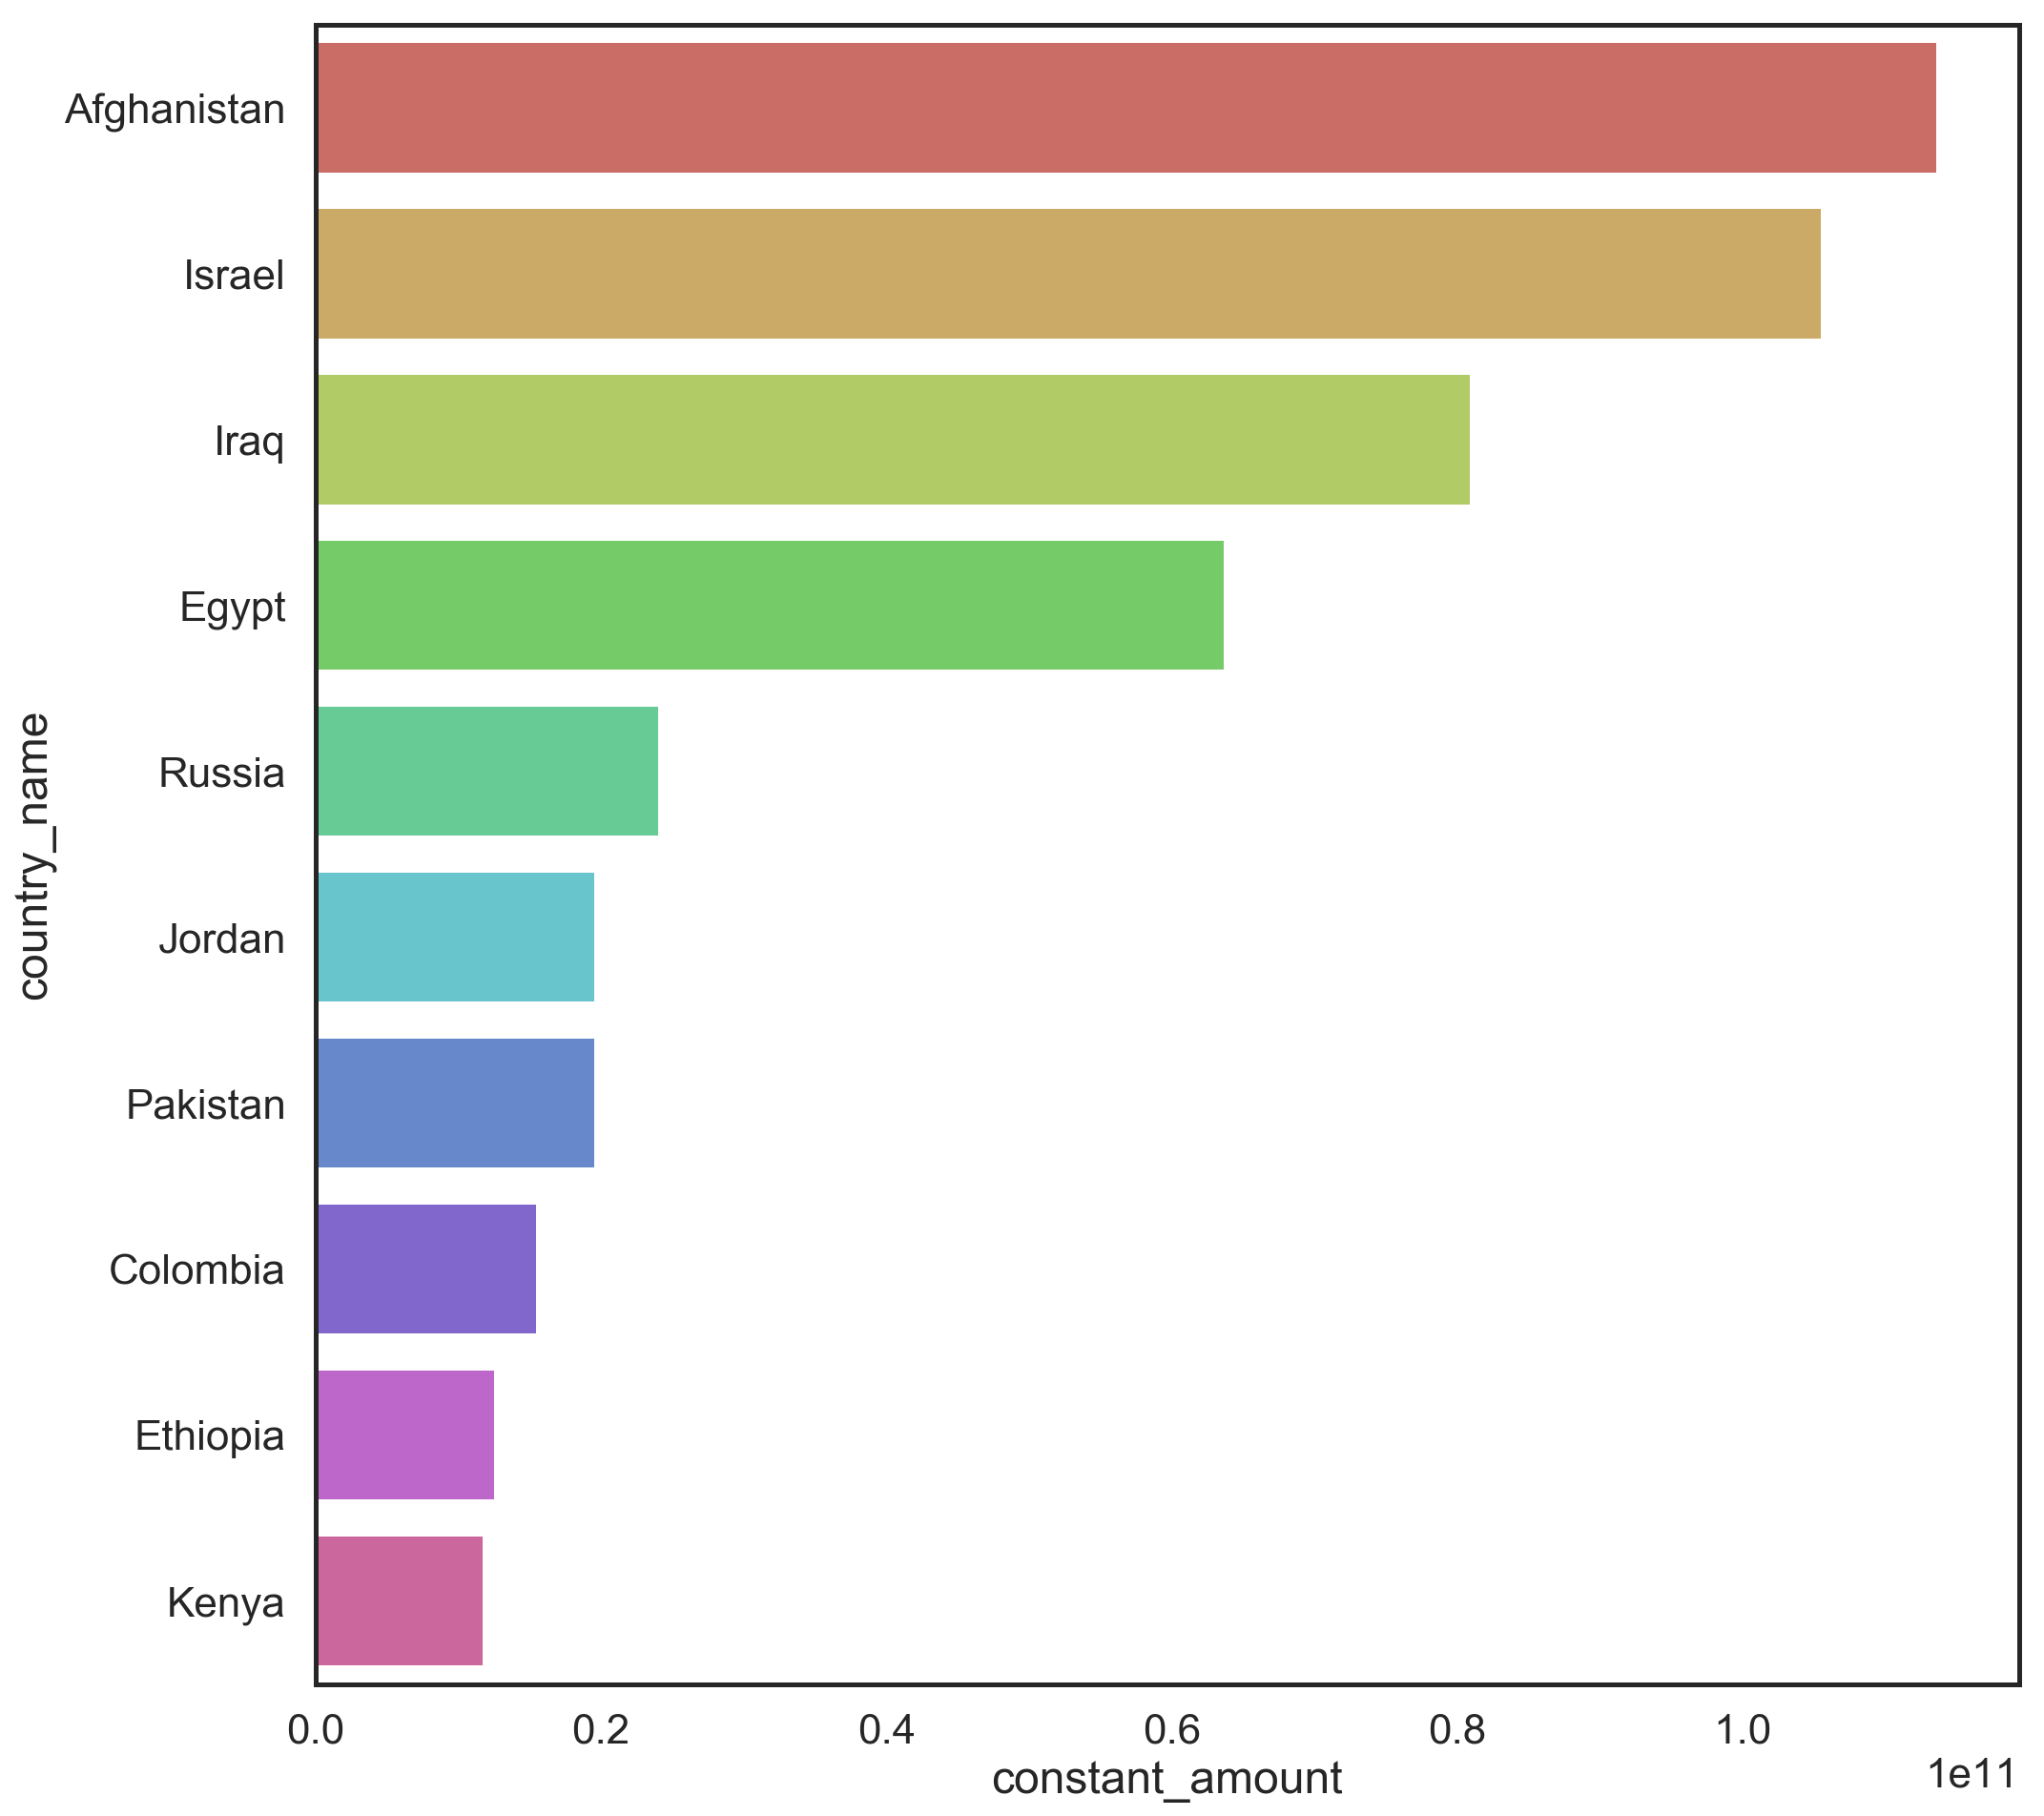

In [174]:
plt.figure(figsize=(16, 16))
sns.set_context("poster")
sns.barplot(x='constant_amount', y='country_name', data=top_10, palette="hls")
#plt.savefig('top_20_countries.png', bbox_inches = 'tight');

In [175]:
# Top 10 by year
# Merge dataframes
top_10_by_year = pd.merge(df, top_10, how='inner', on='country_name'
                         ).groupby(['country_name', 'fiscal_year']
                                  )['constant_amount_x'].sum().reset_index()
top_10_by_year.head()

,country_name,fiscal_year,constant_amount_x
0,Afghanistan,2003,1286968141
1,Afghanistan,2004,2476465248
2,Afghanistan,2005,2141045091
3,Afghanistan,2006,3600858850
4,Afghanistan,2007,5811690098


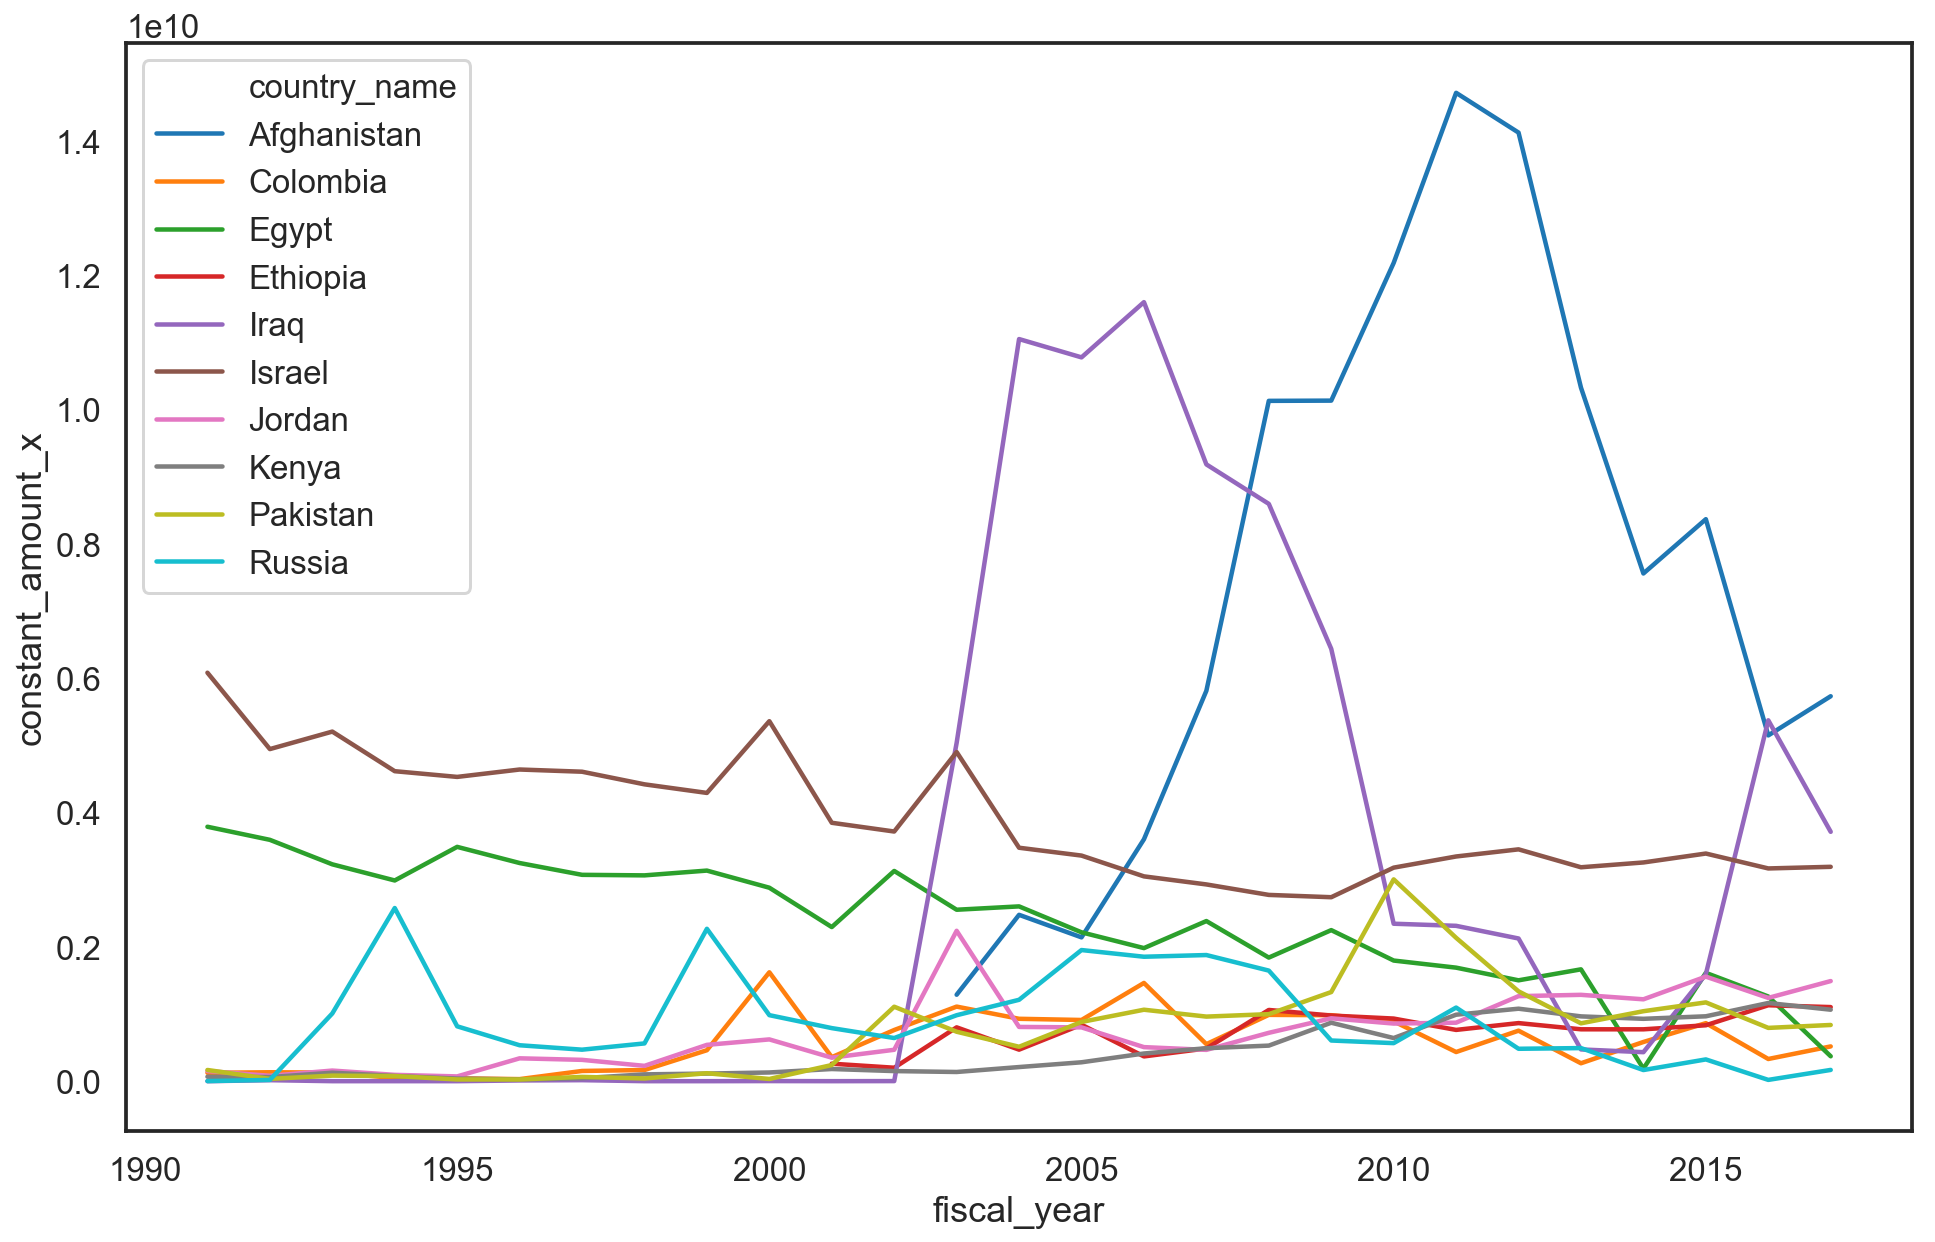

In [178]:
# Plot USAID spending for top 10 countries over time
sns.set_context("talk")
plt.figure(figsize=(16, 10))
sns.lineplot(x='fiscal_year', y='constant_amount_x', hue='country_name', data=top_10_by_year);

In [179]:
# Which income-level countries has the US given the most aid to?
df.groupby('income_group_name').sum().sort_values(
    'constant_amount', ascending = False)['constant_amount']

income_group_name
Lower Middle Income Country    204628366786
Upper Middle Income Country    204242652419
Low Income Country             203132964084
High Income Country            123339226127
Name: constant_amount, dtype: int64

In [180]:
# What type of aid has the US given to High Income Countries?
# df.loc[df.income_group_name == 'High Income Country']['USG_sector_name'].unique()

### Result: all kinds

In [25]:
# See how much money has been given to various sector programs/purposes
#df.groupby('USG_sector_name').sum().sort_values(
 #   'constant_amount', ascending = False)['constant_amount']

USG_sector_name
Stabilization Operations and Security Sector Reform      286141993002
Macroeconomic Foundation for Growth                       79220921997
Protection, Assistance and Solutions                      71408999491
HIV/AIDS                                                  40365634293
Rule of Law and Human Rights                              29953949996
Infrastructure                                            27322817469
Good Governance                                           20424632542
Counter-Narcotics                                         18789109451
Agriculture                                               14577101184
Direct Administrative Costs                               14376888607
Combating Weapons of Mass Destruction (WMD)                9885321046
Basic Education                                            8484174416
Private Sector Competitiveness                             7744042513
Social Services                                            7612461308
Wate

In [181]:
# Where assistance_category_name = 'Military', what are the kinds of programs?
df.loc[df['assistance_category_name'] == 'Military']['dac_sector_name'].unique()

array(['Conflict, Peace, and Security',
       'Other Social Infrastructure and Services', 'Other Multisector',
       'General Environmental Protection', 'Energy', 'Construction',
       'Trade Policy and Regulations', 'Government and Civil Society',
       'Health, General', 'Water Supply and Sanitation',
       'Transport and Storage'], dtype=object)

In [182]:
# What are the implementing agencies where assistance category = 'Military'?
df.loc[df['assistance_category_name'] == 'Military']['implementing_agency_name'].unique()

array(['Department of Defense', 'Department of the Army',
       'Department of State', 'Department of the Navy',
       'Department of the Air Force', 'Department of Homeland Security'],
      dtype=object)

In [183]:
# Where assistance_category_name = 'Economic', what are the kinds of programs?
df.loc[df['assistance_category_name'] == 'Economic']['dac_sector_name'].unique()
### Quite a bit of overlap (Economic assistance covers more issues)

array(['Agriculture', 'Developmental Food Aid/Food Security Assistance',
       'Basic Education', 'General Environmental Protection',
       'Conflict, Peace, and Security', 'Basic Health',
       'Business and Other Services', 'Government and Civil Society',
       'Emergency Response', 'Construction',
       'Mineral Resources and Mining', 'Post-Secondary Education',
       'Reconstruction Relief and Rehabilitation', 'Communications',
       'Energy', 'Transport and Storage', 'Other Multisector',
       'Operating Expenses', 'Health, General',
       'Trade Policy and Regulations',
       'Other Social Infrastructure and Services',
       'Education, Level Unspecified', 'Water Supply and Sanitation',
       'HIV/AIDS', 'Banking and Financial Services', 'Industry',
       'Maternal and Child Health, Family Planning',
       'Program Design and Learning',
       'Disaster Prevention and Preparedness',
       'Administration and Oversight', 'Secondary Education', 'Tourism',
       'Oth

In [184]:
# What are the implementing agencies where assistance category = 'Economic'?
df.loc[df['assistance_category_name'] == 'Economic']['implementing_agency_name'].unique()

array(['Department of Agriculture',
       'Department of Health and Human Services', 'Department of Labor',
       'Department of State', 'Department of the Treasury',
       'Trade and Development Agency',
       'U.S. Agency for International Development',
       'Department of the Army', 'Department of Defense',
       'Department of Transportation', 'Department of Homeland Security',
       'Department of Justice', 'Department of Energy',
       'Department of Commerce', 'Peace Corps',
       'Millennium Challenge Corporation', 'Department of the Interior',
       'African Development Foundation', 'Inter-American Foundation',
       'Environmental Protection Agency', 'National Science Foundation',
       'Open World Leadership Center', 'Federal Trade Commission',
       'United States Institute of Peace',
       'Overseas Private Investment Corporation'], dtype=object)

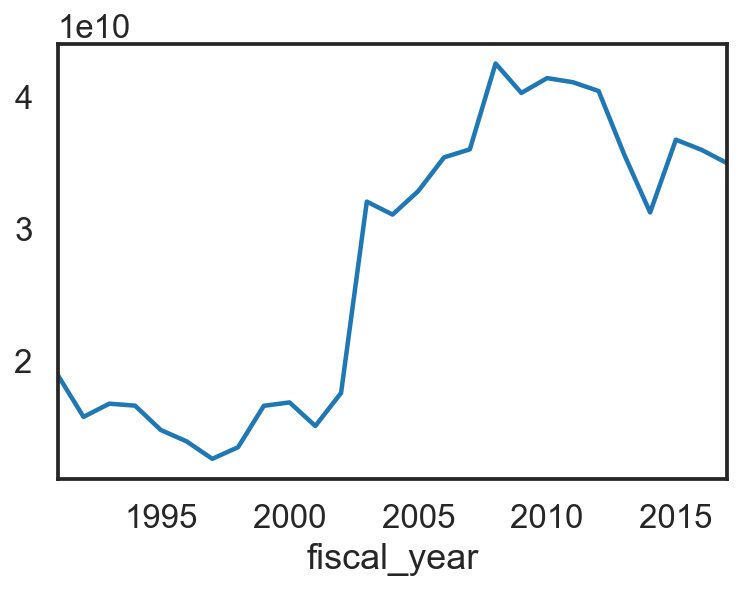

In [185]:
# How much has the goverment given to aid each year?
total_aid_by_year = df.groupby('fiscal_year').sum().sort_values('fiscal_year', ascending = False)['constant_amount']
total_aid_by_year.plot()

# Looks like aid increased significantly after 9/11 and the Iraq War

In [186]:
total_aid_by_year

fiscal_year
2017    34924953720
2016    35942127634
2015    36716358968
2014    31197433715
2013    35565150383
2012    40405147700
2011    41073345423
2010    41383128774
2009    40261017563
2008    42493010981
2007    35983314683
2006    35376610445
2005    32823204483
2004    31036039573
2003    32020280627
2002    17515478283
2001    15008100005
2000    16796749411
1999    16537289536
1998    13399074875
1997    12518446732
1996    13843364304
1995    14705025205
1994    16550978788
1993    16699876420
1992    15698755470
1991    18868945715
Name: constant_amount, dtype: int64

In [187]:
# Plot economic aid by year (wonder if it's different)

#economic_aid_by_year = 
economic_aid = df.loc[df['assistance_category_name'] == 'Economic']

economic_aid_by_year = economic_aid.groupby('fiscal_year').sum().sort_values(
    'fiscal_year', ascending = False)['constant_amount']


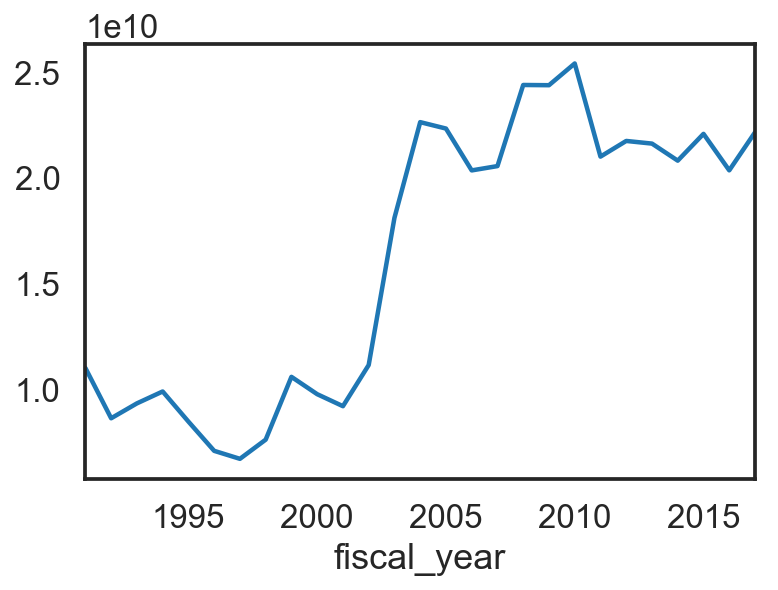

In [188]:
economic_aid_by_year.plot()

In [34]:
# Things to do:

# - Map USAID spending for top, like, 20 countries over time
# - Bar graph by year for military vs economic expenditures
# - Line plot for total economic vs military spending over time
# - Line plot comparing US GDP to aid spending?



# For main models, 
# maybe have row for each country, and aggregate sum spent in each 
# 'dac_purpose_name' entry
# or 


###### input should be percent of GDP spent on aid in a given year?

# Figure out if there's a correlation like, every dollar spent results in such and such change

#### what if result was HDI score CHANGE for that year (from year before), inputs are country 
## (countries should be dummy-coded), amount of money spent that year on 'dac_purpose_name'
##  -->> use this to figure out which variables/programs have the biggest effect!!!


In [35]:
# First, do we want to see if there's correlation between aid received and HDI? 
# like graph money given vs HDI 